<a href="https://colab.research.google.com/github/SatyaPraveenKumarreddyYalla/Codespaze/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import impute
from sklearn import pipeline
from sklearn.model_selection import train_test_split

In [38]:
df= pd.read_csv("/content/sample_data/IPL_Dataset(2008-2024).csv")
df.head()

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132.0,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,166.0,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,112.0,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28


In [39]:
df.describe()

,Match_ID,Win_Margin,First_Innings_Score,Second_Innings_Score,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
count,1.073000e+03,1054.000000,1073.000000,1070.000000,1073.000000,1073.000000,1073.000000
mean,8.941365e+05,17.158444,165.164958,151.918692,46.074557,78.248835,40.841566
std,3.637486e+05,21.762303,31.904238,31.751666,12.007306,18.604148,14.228121
min,3.359820e+05,1.000000,56.000000,2.000000,15.000000,0.000000,0.000000
25%,5.483260e+05,6.000000,145.000000,134.000000,38.000000,66.000000,33.000000
50%,9.809390e+05,8.000000,165.000000,153.000000,46.000000,77.000000,41.000000
75%,1.216540e+06,19.750000,186.000000,172.000000,53.000000,90.000000,50.000000
max,1.426287e+06,146.000000,287.000000,262.000000,125.000000,155.000000,89.000000


#ViSuvalization and modeling

Index(['Match_ID', 'Date', 'Teams', 'Venue', 'Toss_Winner', 'Toss_Decision',
       'Match_Winner', 'Win_Type', 'Win_Margin', 'First_Innings_Score',
       'Second_Innings_Score', 'Player_of_Match', 'Umpire', 'Umpire1',
       'Umpire2', 'Powerplay_Scores', 'Middle_Overs_Scores',
       'Death_Overs_Scores'],
      dtype='object')


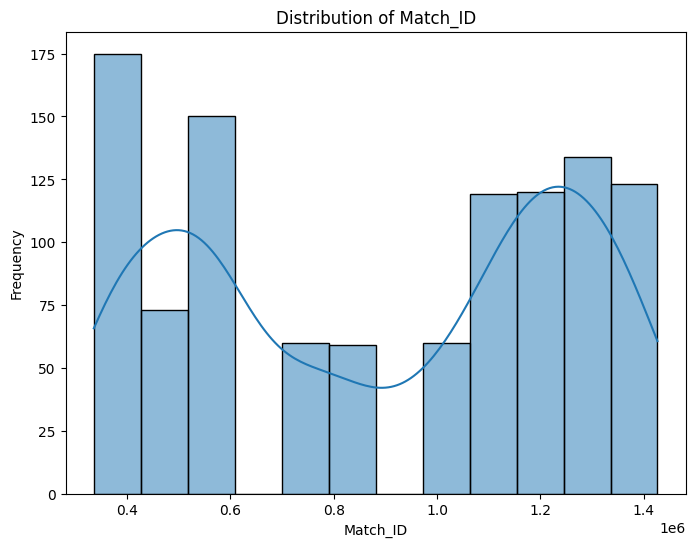

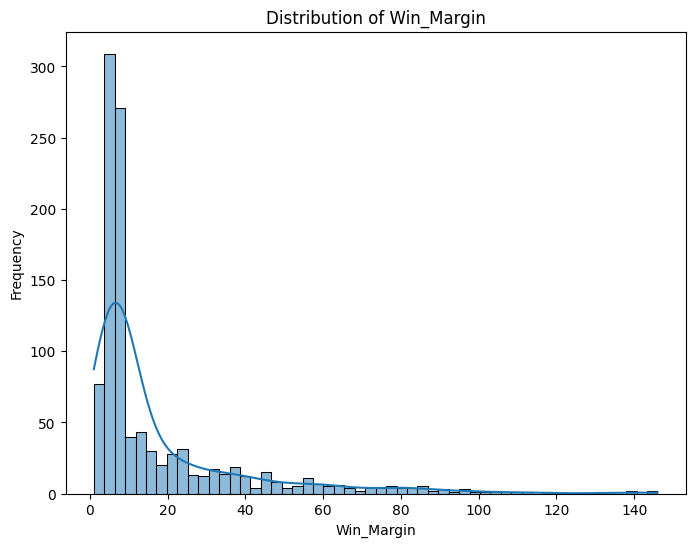

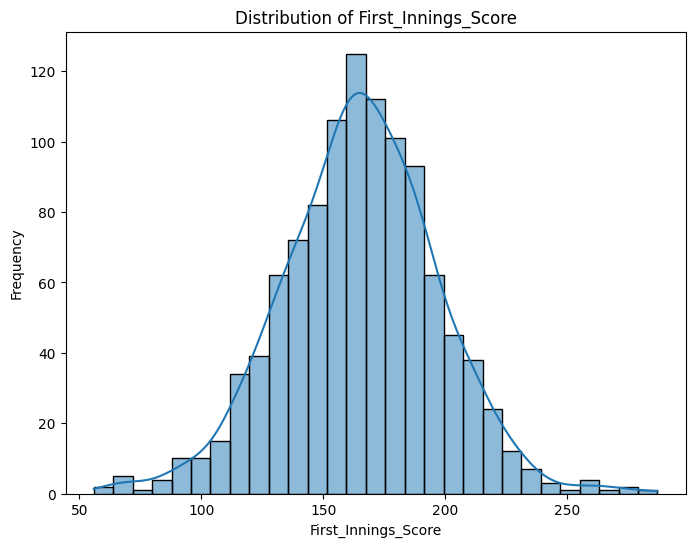

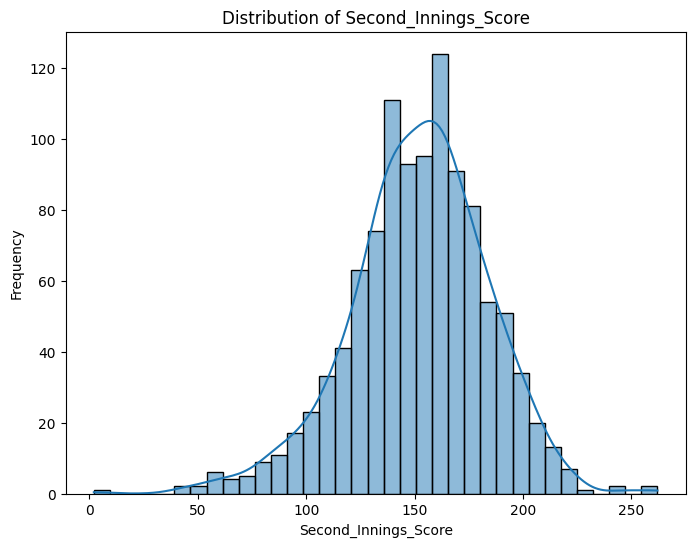

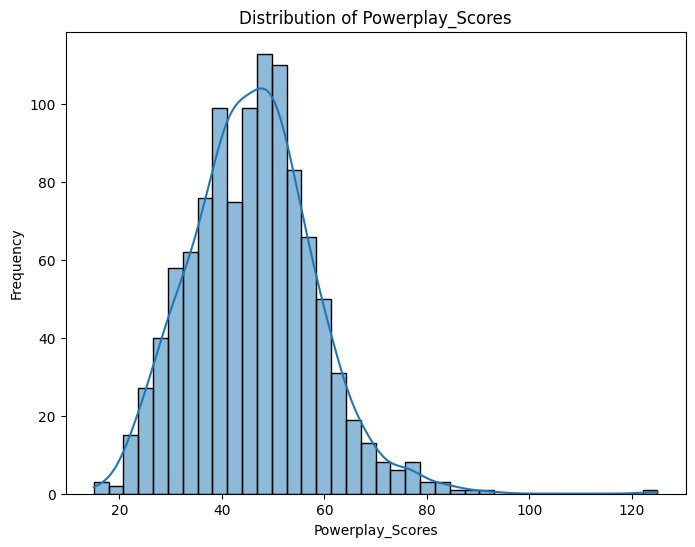

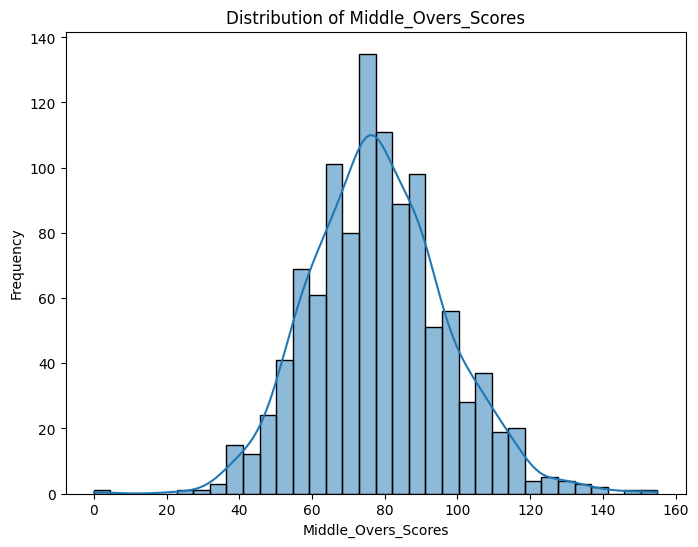

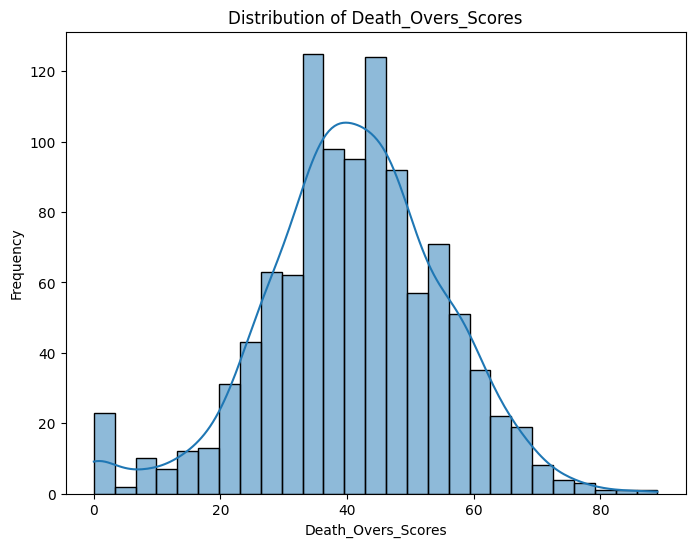

In [40]:
col = df.columns
print(col)
for col in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

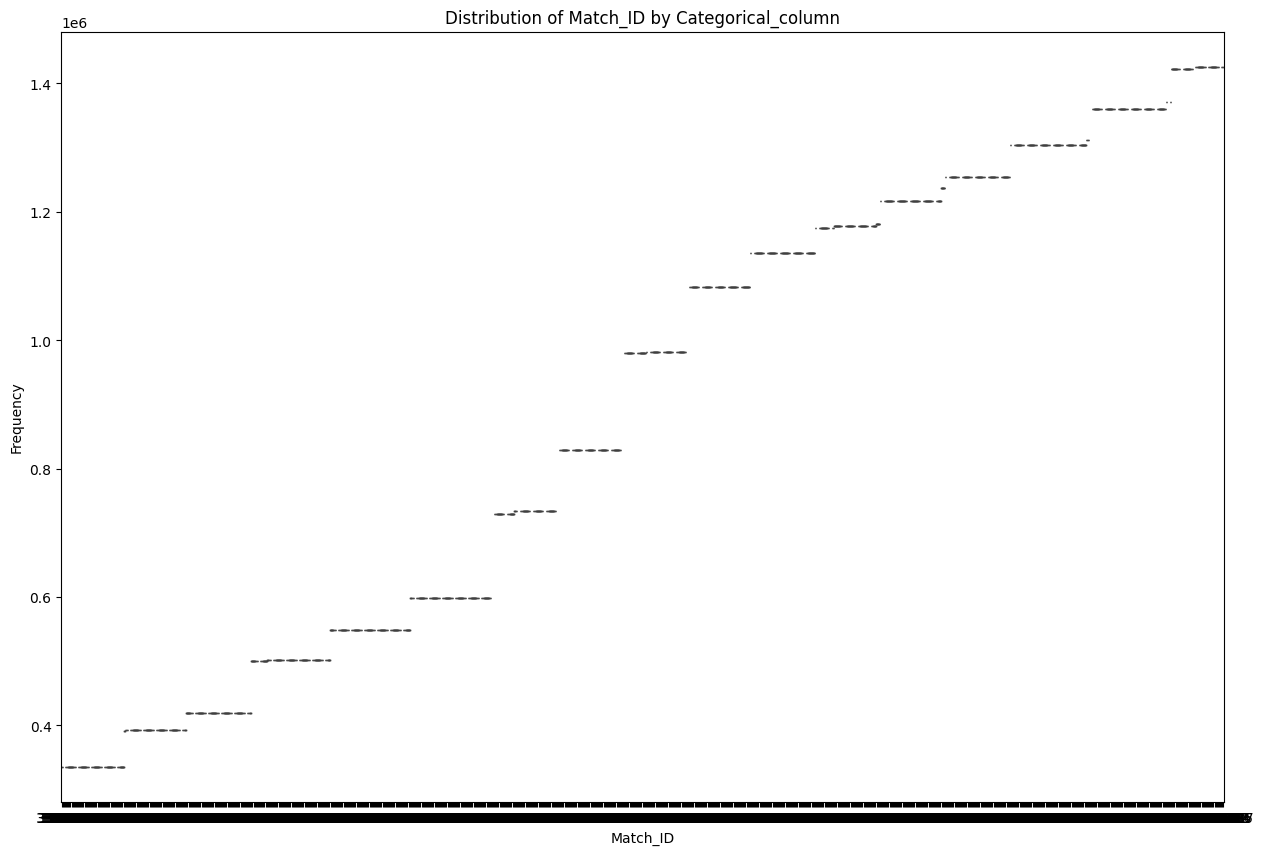

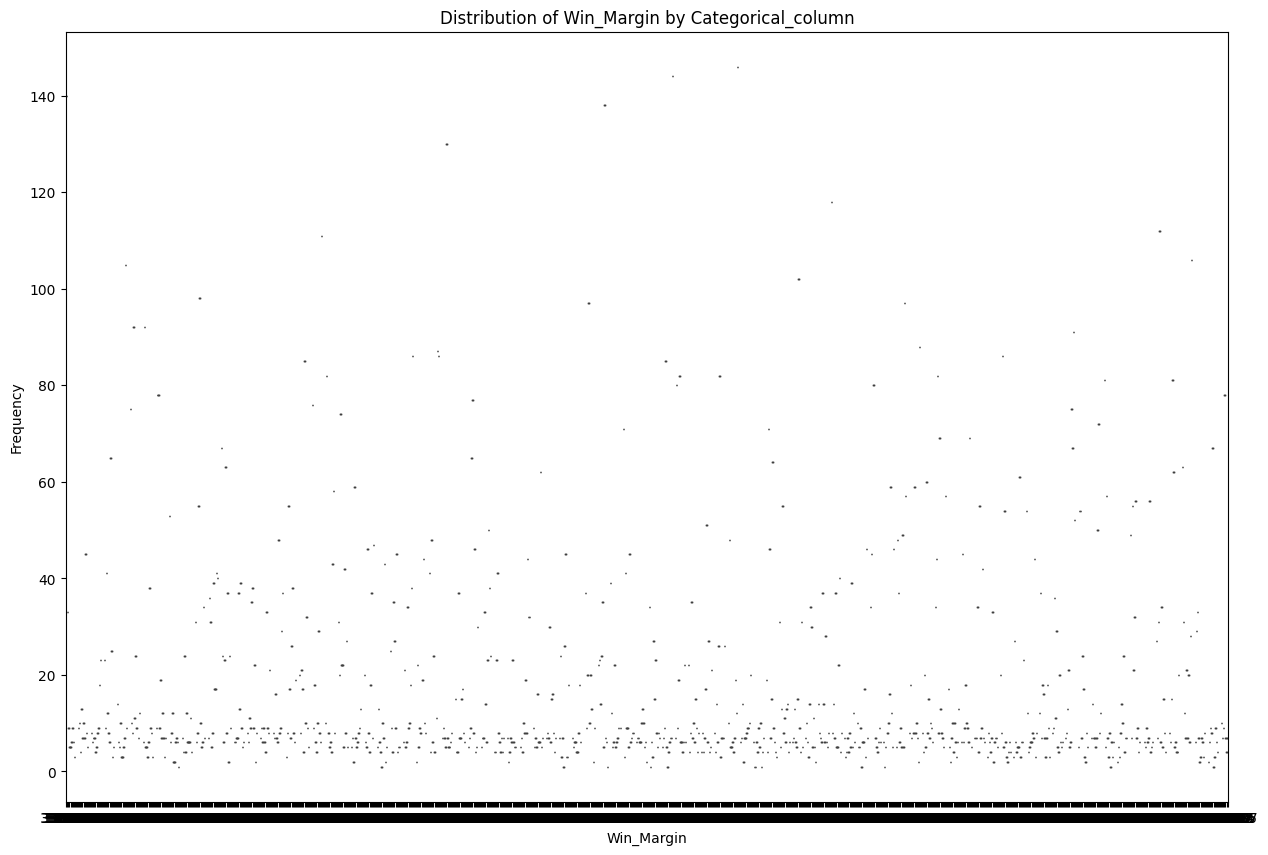

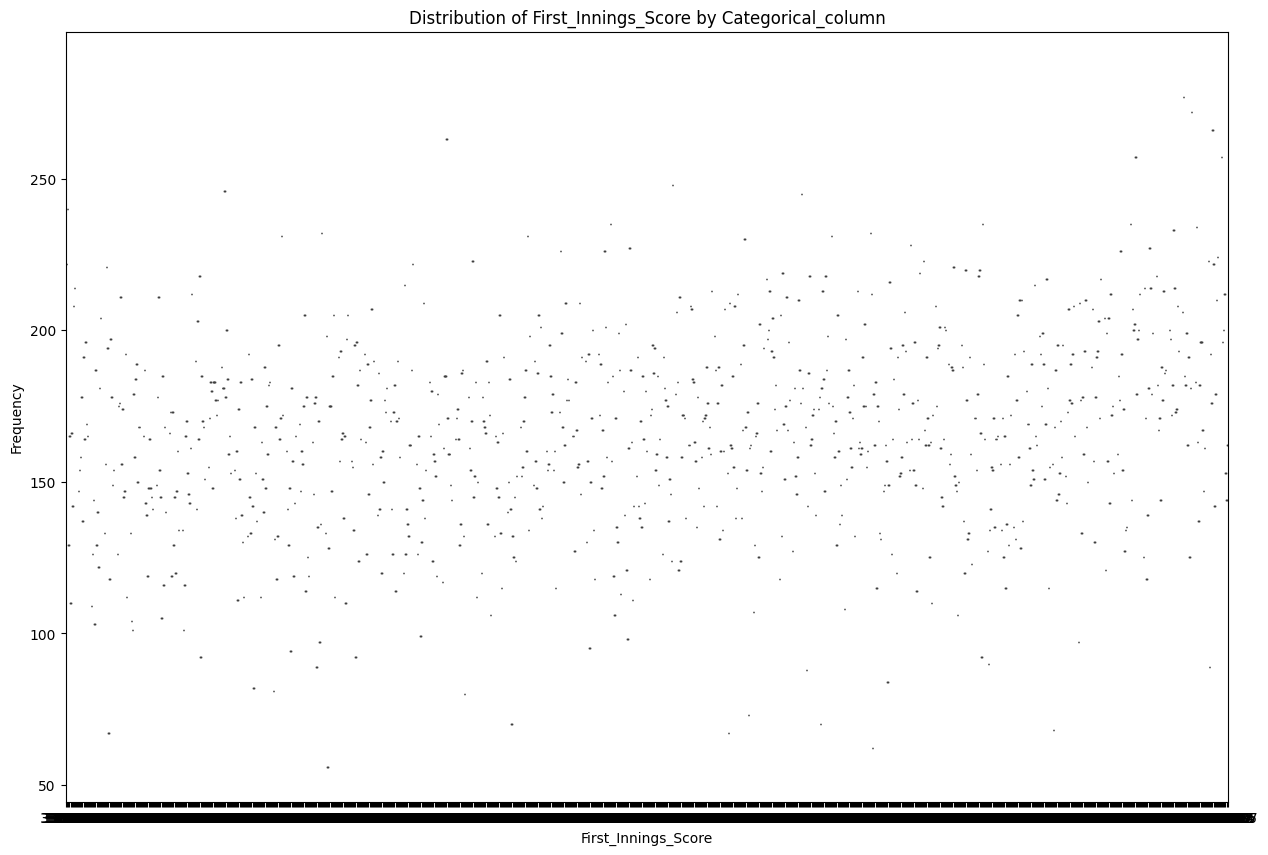

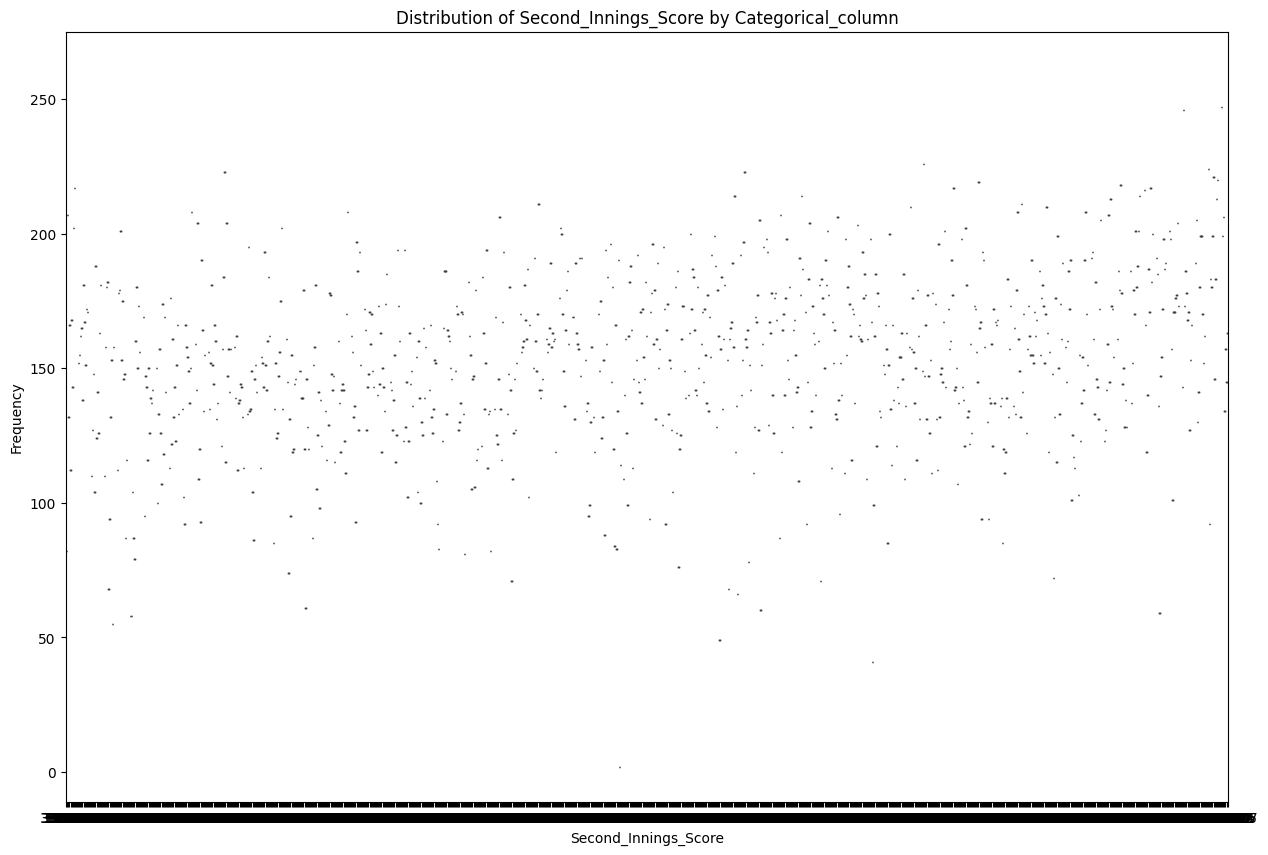

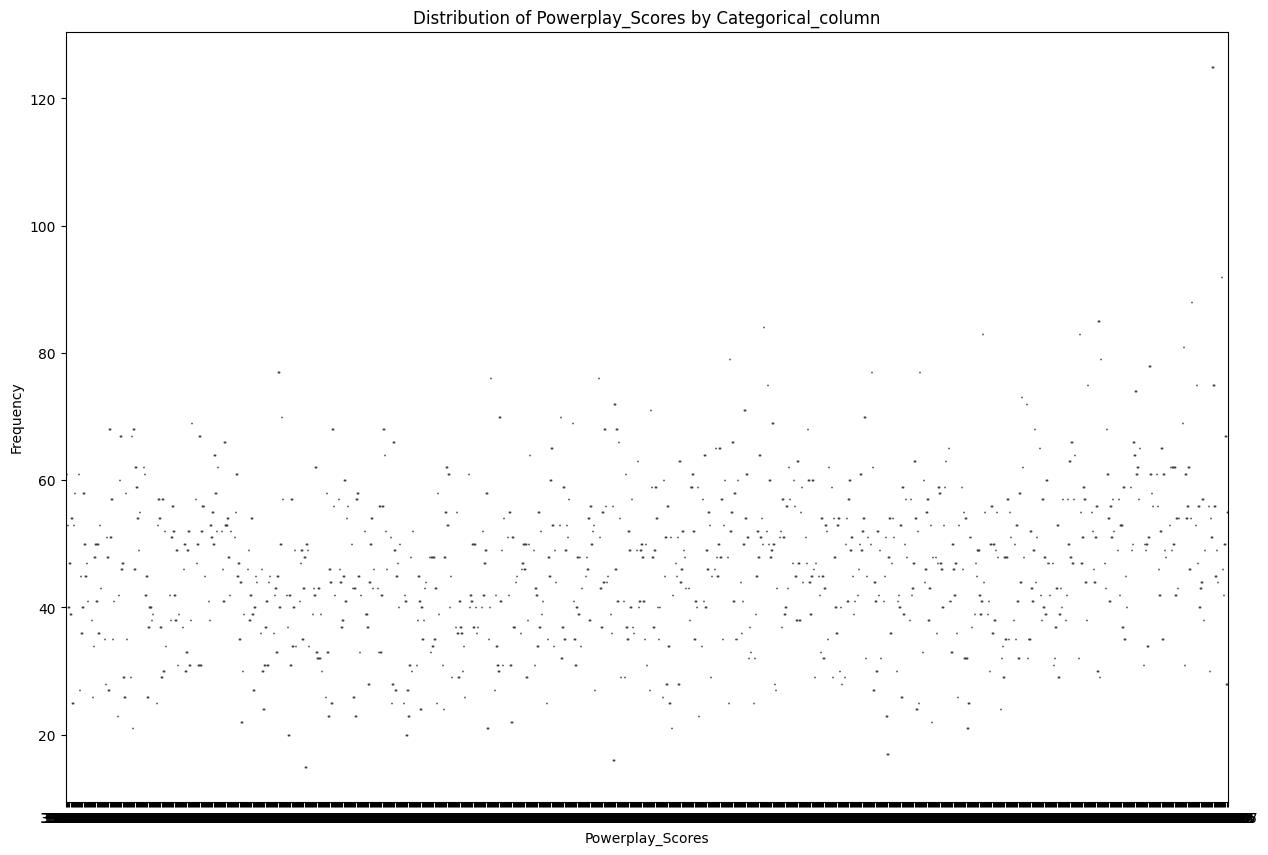

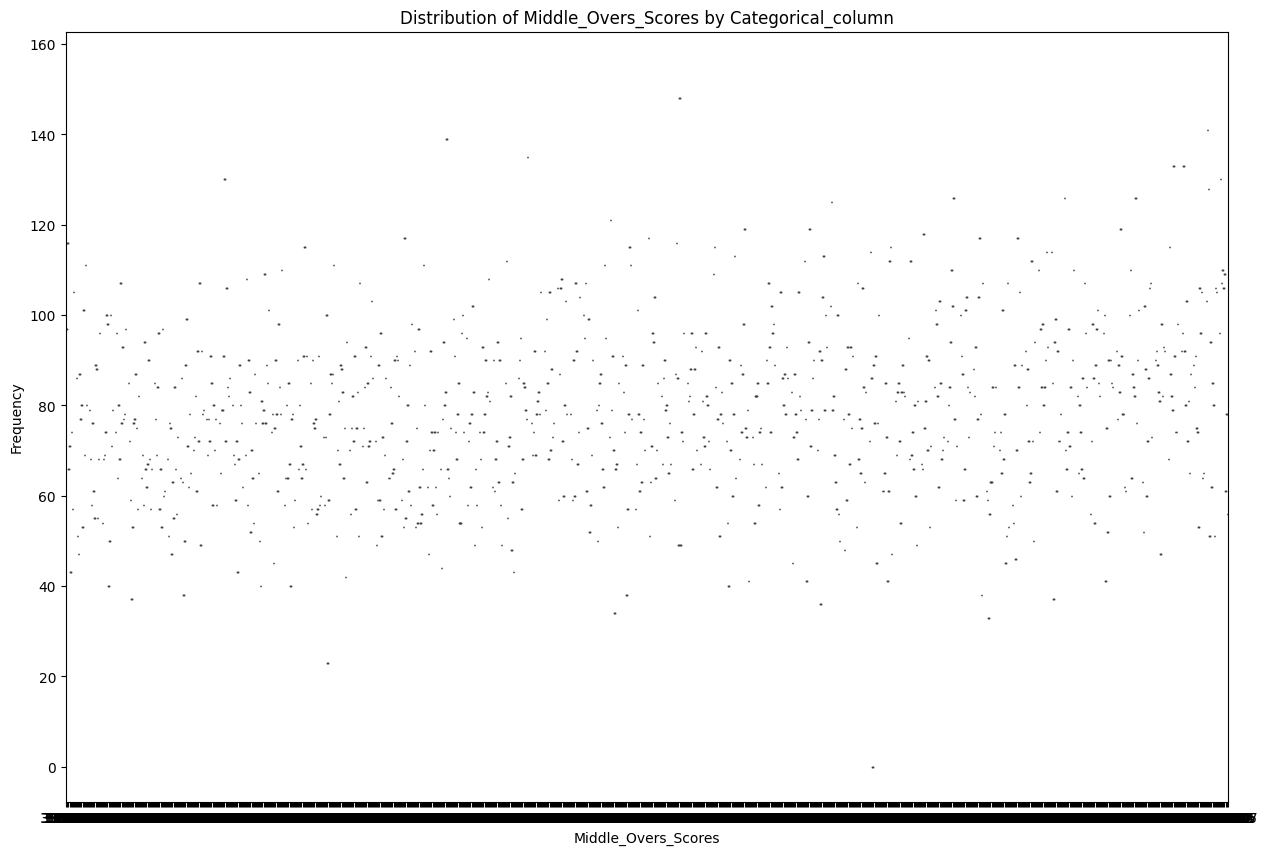

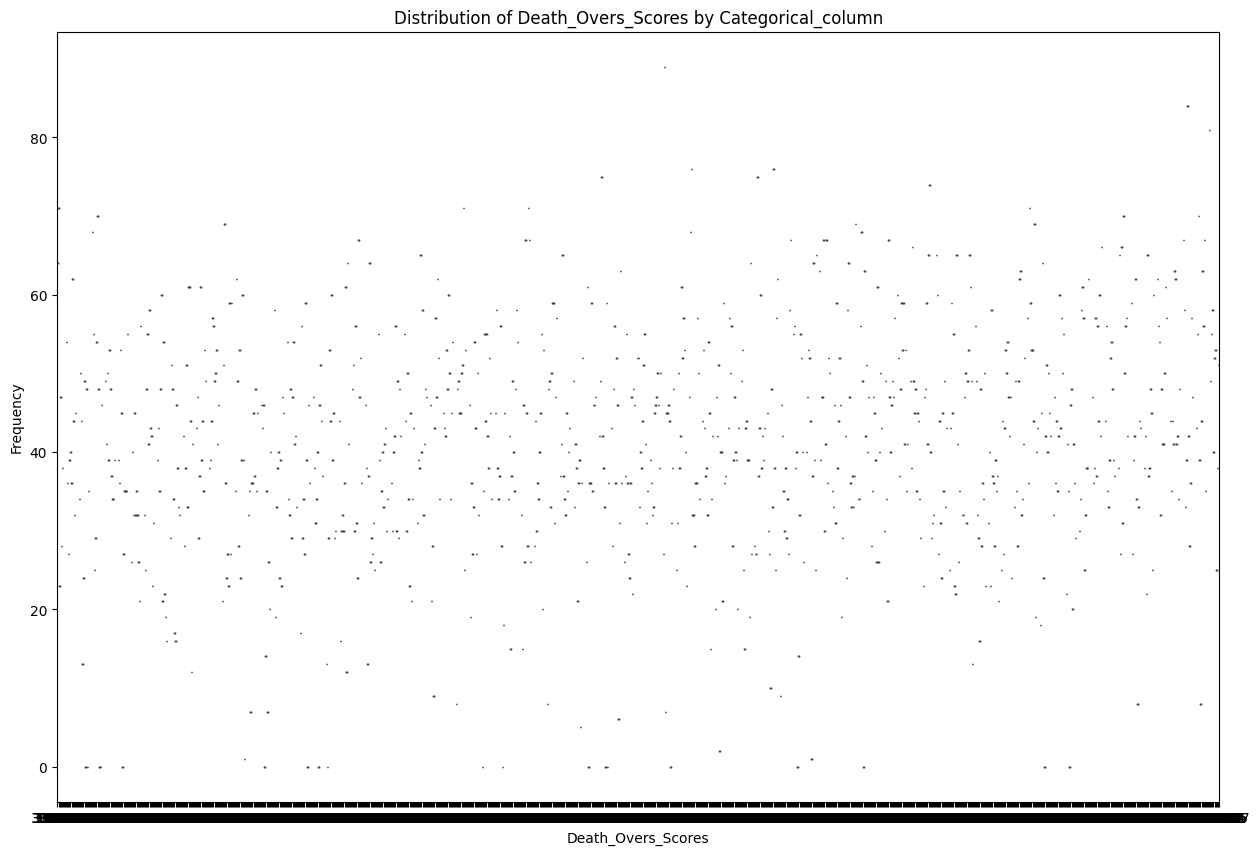

In [42]:
for col in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(15,10))
  sns.boxplot(x='Match_ID',y=col,data=df)
  plt.title(f'Distribution of {col} by Categorical_column')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [43]:
# prompt: convert string in a dataframe  into integers values

# Convert string columns to numeric, handling errors
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid parsing will be NaN
    except Exception as e:
        print(f"Error converting column '{col}': {e}")

# Fill NaN values (resulting from invalid conversions) with a suitable value (e.g., 0 or the mean)
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(0) # or df[col].fillna(df[col].mean())


#Check the data types of columns after the conversion
df.dtypes


,0
Match_ID,int64
Date,float64
Teams,float64
Venue,float64
Toss_Winner,float64
Toss_Decision,float64
Match_Winner,float64
Win_Type,float64
Win_Margin,float64
First_Innings_Score,int64


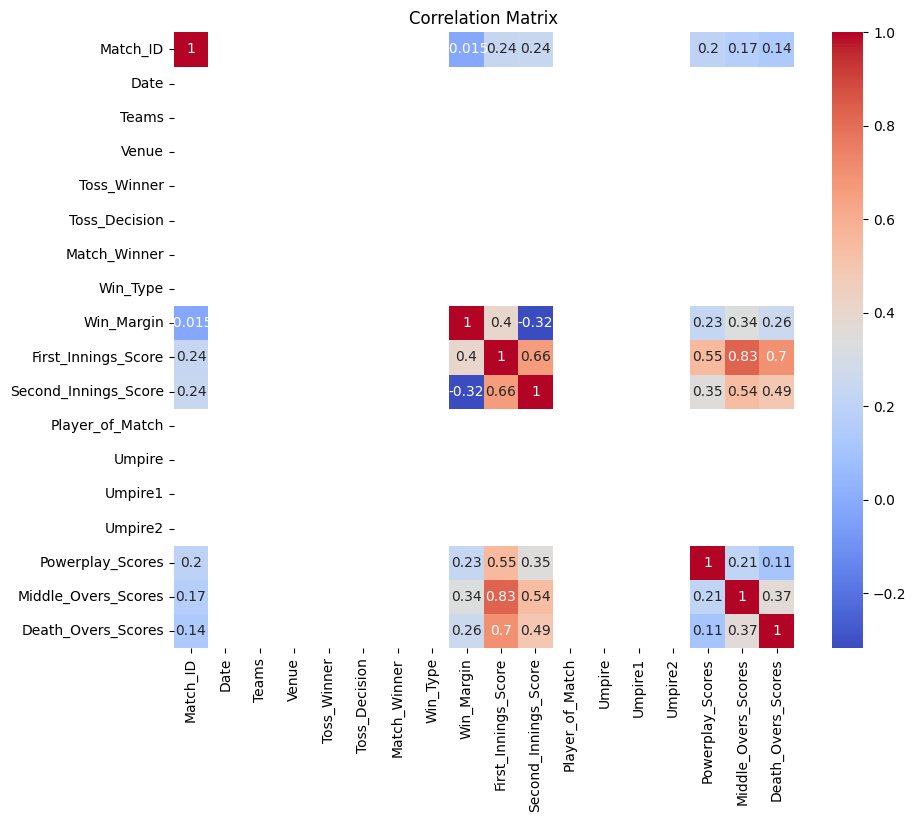

In [44]:
#Correlation_Matrix
plt.figure(figsize=(10,8))
Correlation_Matrix = df.corr()
sns.heatmap(Correlation_Matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [46]:
#Modelling
from sklearn.metrics import mean_squared_error,r2_score
# x =df[[[[[[['Match_ID','Win_Margin','First_Innings_Score','Second_Innings_Score','Powerplay_Scores','Middle_Overs_Scores','Death_Overs_Scores']]]]]]]
x = df[['Match_ID','Win_Margin','First_Innings_Score','Second_Innings_Score','Powerplay_Scores','Middle_Overs_Scores','Death_Overs_Scores']]
y = df['Venue']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
#Pred_metrics
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Y_PRED: ',y_pred)
print(f'Y_TEST: ',y_test)
print(f'X_TRAIN: ',x_train)
print('Coefficients:',model.coef_)
print('Intercept:',model.intercept_)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Y_PRED:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Y_TEST:  992     0.0
746     0.0
1067    0.0
425     0.0
490     0.0
       ... 
634     0.0
486     0.0
298     0.0
582     0.0
576     0.0
Name: Venue, Length: 215, dtype: float64
X_TRAIN:        Match_ID  Win_Margin  First_Innings_Score  Second_Innings_Score  \
1041   1422136         6.0                  165                 166.0  

In [47]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

In [36]:
df1 = df
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,0.0,0.0,0,1,0.0,0.0,0.0,0,1,1,0.0,0,0.0,0.0,0.0
1,335982,1,0.0,0.0,0,2,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0
2,335982,1,0.0,0.0,0,3,0.0,0.0,0.0,0,1,1,0.0,0,0.0,0.0,0.0
3,335982,1,0.0,0.0,0,4,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0
4,335982,1,0.0,0.0,0,5,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0


# Task
convert the strings in this data frame into integer data numerical form in the data set

Here is all the data you need:
"IPL_Dataset(2008-2024).csv"

## Data loading

### Subtask:
Load the IPL dataset.


**Reasoning**:
Load the IPL dataset and display basic information.



In [1]:
import pandas as pd

try:
    df_ipl = pd.read_csv('IPL_Dataset(2008-2024).csv')
    display(df_ipl.head())
    print(df_ipl.shape)
    print(df_ipl.info())
except FileNotFoundError:
    print("Error: 'IPL_Dataset(2008-2024).csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132.0,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,166.0,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,112.0,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28


(1073, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Match_ID              1073 non-null   int64  
 1   Date                  1073 non-null   object 
 2   Teams                 1073 non-null   object 
 3   Venue                 1073 non-null   object 
 4   Toss_Winner           1073 non-null   object 
 5   Toss_Decision         1073 non-null   object 
 6   Match_Winner          1073 non-null   object 
 7   Win_Type              1054 non-null   object 
 8   Win_Margin            1054 non-null   float64
 9   First_Innings_Score   1073 non-null   int64  
 10  Second_Innings_Score  1070 non-null   float64
 11  Player_of_Match       1068 non-null   object 
 12  Umpire                1073 non-null   object 
 13  Umpire1               1073 non-null   object 
 14  Umpire2               1073 non-null   object 
 15  Powerplay_

## Data exploration

### Subtask:
Explore the loaded IPL dataset (`df_ipl`) to identify string columns suitable for numerical conversion.


**Reasoning**:
Inspect the specified string columns in `df_ipl` to determine their data type and unique values. This will help in deciding how to convert them into numerical form.



In [2]:
string_columns = ['Date', 'Teams', 'Venue', 'Toss_Winner', 'Toss_Decision', 'Winning_Team', 'Win_Type', 'Player_of_Match']

for col in string_columns:
    if col in df_ipl.columns:
        print(f"Column: {col}")
        print(f"Data type: {df_ipl[col].dtype}")
        print(f"Unique values: {df_ipl[col].unique()[:20]}")  # Displaying the first 20 unique values for brevity
        print(f"Value counts:\n{df_ipl[col].value_counts()[:10]}") # Display the top 10 counts
        print("-" * 50)
    else:
        print(f"Column '{col}' not found in the DataFrame.")

Column: Date
Data type: object
Unique values: ['2008-04-18' '2008-04-19' '2008-04-20' '2008-04-21' '2008-04-22'
 '2008-04-23' '2008-04-24' '2008-04-25' '2008-04-26' '2008-04-27'
 '2008-04-28' '2008-04-29' '2008-04-30' '2008-05-01' '2008-05-02'
 '2008-05-25' '2008-05-03' '2008-05-04' '2008-05-05' '2008-05-06']
Value counts:
Date
2016-05-21    2
2013-05-12    2
2014-04-19    2
2014-04-18    2
2022-04-02    2
2013-05-19    2
2013-05-18    2
2022-04-09    2
2013-05-15    2
2022-04-10    2
Name: count, dtype: int64
--------------------------------------------------
Column: Teams
Data type: object
Unique values: ['Royal Challengers Bangalore vs Kolkata Knight Riders'
 'Kings XI Punjab vs Chennai Super Kings'
 'Delhi Daredevils vs Rajasthan Royals'
 'Mumbai Indians vs Royal Challengers Bangalore'
 'Kolkata Knight Riders vs Deccan Chargers'
 'Rajasthan Royals vs Kings XI Punjab'
 'Deccan Chargers vs Delhi Daredevils'
 'Chennai Super Kings vs Mumbai Indians'
 'Deccan Chargers vs Rajasthan Royal

**Reasoning**:
Based on the output from the previous code block, I will document my findings for each string column, categorizing them as categorical, ordinal, numerical, date, or unusable, and providing examples.  I will then consider the impact of numerical conversion on downstream analysis and document preliminary thoughts on the best approach for each column.



In [3]:
# Documenting findings and potential conversion approaches
print("Analysis of String Columns:")

# Date
print("\nDate:")
print("Type: Date")
print("Description: Dates of matches.  Can be converted to numerical representation (e.g., days since a reference date) for time series analysis.")
print("Example: 2008-04-18")
print("Conversion Approach: Convert to datetime objects and then to ordinal values (days since a reference date).")


# Teams
print("\nTeams:")
print("Type: Categorical")
print("Description: Teams participating in the match.  Should be one-hot encoded or label encoded.")
print("Example: 'Royal Challengers Bangalore vs Kolkata Knight Riders'")
print("Conversion Approach: One-hot encode to avoid implying order between teams.")

# Venue
print("\nVenue:")
print("Type: Categorical")
print("Description: Location of the match.  Should be one-hot encoded or label encoded.")
print("Example: 'M Chinnaswamy Stadium'")
print("Conversion Approach: One-hot encode to avoid implying order between venues.")

# Toss_Winner
print("\nToss_Winner:")
print("Type: Categorical")
print("Description: Team winning the toss.  Should be one-hot encoded or label encoded.")
print("Example: 'Royal Challengers Bangalore'")
print("Conversion Approach: One-hot encode to avoid implying order between teams.")

# Toss_Decision
print("\nToss_Decision:")
print("Type: Categorical/Ordinal (debatable)")
print("Description: Decision made by the toss winner (bat or field).  Potentially ordinal, but one-hot encoding is safer.")
print("Example: 'field'")
print("Conversion Approach: Label encode or one-hot encode. Label encoding is slightly preferred as bat and field have a binary relationship.")

# Win_Type
print("\nWin_Type:")
print("Type: Categorical/Ordinal (debatable)")
print("Description: How the match was won (runs or wickets).  Potentially ordinal, but one-hot encoding is safer.")
print("Example: 'runs'")
print("Conversion Approach: Label encode or one-hot encode. Label encoding is slightly preferred as runs and wickets have a binary relationship.")

# Player_of_Match
print("\nPlayer_of_Match:")
print("Type: Categorical")
print("Description: Player of the match.  Should be one-hot encoded or label encoded.")
print("Example: 'BB McCullum'")
print("Conversion Approach: One-hot encode or label encode, depending on the requirement of the model.")


print("\nWinning_Team:")
print("Status: Missing")
print("Comment: This column seems to be missing in the dataset, based on the provided information.")

Analysis of String Columns:

Date:
Type: Date
Description: Dates of matches.  Can be converted to numerical representation (e.g., days since a reference date) for time series analysis.
Example: 2008-04-18
Conversion Approach: Convert to datetime objects and then to ordinal values (days since a reference date).

Teams:
Type: Categorical
Description: Teams participating in the match.  Should be one-hot encoded or label encoded.
Example: 'Royal Challengers Bangalore vs Kolkata Knight Riders'
Conversion Approach: One-hot encode to avoid implying order between teams.

Venue:
Type: Categorical
Description: Location of the match.  Should be one-hot encoded or label encoded.
Example: 'M Chinnaswamy Stadium'
Conversion Approach: One-hot encode to avoid implying order between venues.

Toss_Winner:
Type: Categorical
Description: Team winning the toss.  Should be one-hot encoded or label encoded.
Example: 'Royal Challengers Bangalore'
Conversion Approach: One-hot encode to avoid implying order bet

## Data wrangling

### Subtask:
Convert the identified string columns in `df_ipl` to numerical representations.


**Reasoning**:
Convert the 'Date' column to datetime objects and then to ordinal values. Apply one-hot encoding to the specified categorical columns. Handle potential errors during the conversion process.



In [4]:
import pandas as pd

# Date conversion
try:
    df_ipl['Date'] = pd.to_datetime(df_ipl['Date'])
    df_ipl['Date_Ordinal'] = (df_ipl['Date'] - df_ipl['Date'].min()).dt.days
    df_ipl.drop('Date', axis=1, inplace = True)
except Exception as e:
    print(f"Error during date conversion: {e}")

# Categorical encoding
categorical_cols = ['Teams', 'Venue', 'Toss_Winner', 'Player_of_Match']
try:
    encoded_cols = pd.get_dummies(df_ipl[categorical_cols], drop_first=True)
    df_ipl = pd.concat([df_ipl, encoded_cols], axis=1)
    df_ipl.drop(categorical_cols, axis=1, inplace = True)
except KeyError as e:
    print(f"Error: Column '{e}' not found in DataFrame during one-hot encoding.")
except Exception as e:
    print(f"An unexpected error occurred during one-hot encoding: {e}")

# Ordinal encoding for 'Toss_Decision' and 'Win_Type'
try:
    toss_decision_mapping = {'field': 0, 'bat': 1}
    df_ipl['Toss_Decision'] = df_ipl['Toss_Decision'].map(toss_decision_mapping)

    win_type_mapping = {'runs': 0, 'wickets': 1}
    df_ipl['Win_Type'] = df_ipl['Win_Type'].map(win_type_mapping)
except Exception as e:
    print(f"An error occurred during ordinal encoding: {e}")

display(df_ipl.head())

,Match_ID,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Umpire,Umpire1,Umpire2,...,Player_of_Match_WG Jacks,Player_of_Match_WP Saha,Player_of_Match_WPUJC Vaas,Player_of_Match_Washington Sundar,Player_of_Match_YBK Jaiswal,Player_of_Match_YK Pathan,Player_of_Match_YS Chahal,Player_of_Match_Yash Thakur,Player_of_Match_Yuvraj Singh,Player_of_Match_Z Khan
0,335982,0,Kolkata Knight Riders,0.0,140.0,222,82.0,Asad Rauf,RE Koertzen,J Srinath,...,False,False,False,False,False,False,False,False,False,False
1,335983,1,Chennai Super Kings,0.0,33.0,240,207.0,MR Benson,SL Shastri,S Venkataraghavan,...,False,False,False,False,False,False,False,False,False,False
2,335984,1,Delhi Daredevils,1.0,9.0,129,132.0,Aleem Dar,GA Pratapkumar,GR Viswanath,...,False,False,False,False,False,False,False,False,False,False
3,335985,1,Royal Challengers Bangalore,1.0,5.0,165,166.0,SJ Davis,DJ Harper,J Srinath,...,False,False,False,False,False,False,False,False,False,False
4,335986,1,Kolkata Knight Riders,1.0,5.0,110,112.0,BF Bowden,K Hariharan,FM Engineer,...,False,False,False,False,False,False,False,False,False,False


## Data preparation

### Subtask:
Verify the data types of all columns in the DataFrame `df_ipl` to ensure the string columns have been successfully converted to numerical representations. Handle any remaining issues or unexpected data types.


**Reasoning**:
Check the data types of all columns in `df_ipl` and handle any remaining string columns.



In [5]:
# Check data types
print(df_ipl.dtypes.value_counts())
object_columns = df_ipl.select_dtypes(include=['object']).columns
print(f"\nObject columns: {object_columns}")

if len(object_columns) > 0:
    print("\nRemaining object columns found.  Further investigation and conversion are needed.")
    for col in object_columns:
        print(f"\nColumn '{col}':")
        print(df_ipl[col].unique())
        print(df_ipl[col].value_counts())

    # Handle remaining columns (example: one-hot encode 'Umpire' columns if they are still object type)
    umpire_cols = ['Umpire', 'Umpire1', 'Umpire2']
    for col in umpire_cols:
        if col in df_ipl.columns and df_ipl[col].dtype == 'object':
            try:
                encoded_umpire = pd.get_dummies(df_ipl[col], prefix=col, drop_first=True)
                df_ipl = pd.concat([df_ipl, encoded_umpire], axis=1)
                df_ipl.drop(col, axis=1, inplace=True)
            except Exception as e:
                print(f"Error handling umpire column {col}: {e}")
else:
    print("\nNo remaining object columns found.")

print(df_ipl.dtypes.value_counts())
display(df_ipl.head())

bool       573
int64        7
object       4
float64      3
Name: count, dtype: int64

Object columns: Index(['Match_Winner', 'Umpire', 'Umpire1', 'Umpire2'], dtype='object')

Remaining object columns found.  Further investigation and conversion are needed.

Column 'Match_Winner':
['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Daredevils'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Kings XI Punjab'
 'Deccan Chargers' 'Mumbai Indians' 'Draw/No Result' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings'
 'Gujarat Titans' 'Lucknow Super Giants' 'Royal Challengers Bengaluru']
Match_Winner
Mumbai Indians                 141
Chennai Super Kings            136
Kolkata Knight Riders          125
Royal Challengers Bangalore    114
Rajasthan Royals               109
Kings XI Punjab                 85
Sunrisers Hyderabad             83
Delhi Daredevils                67
Delh

,Match_ID,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,...,Umpire2_Raju Mukherjee,Umpire2_S Chaturvedi,Umpire2_S Venkataraghavan,Umpire2_SA Satbhai,Umpire2_SS Raul,Umpire2_Sanjay Verma,Umpire2_Shakti Singh,Umpire2_Talat Ali,Umpire2_V Narayan Kutty,Umpire2_Yashpal Sharma
0,335982,0,Kolkata Knight Riders,0.0,140.0,222,82.0,61,97,64,...,False,False,False,False,False,False,False,False,False,False
1,335983,1,Chennai Super Kings,0.0,33.0,240,207.0,53,116,71,...,False,False,True,False,False,False,False,False,False,False
2,335984,1,Delhi Daredevils,1.0,9.0,129,132.0,40,66,23,...,False,False,False,False,False,False,False,False,False,False
3,335985,1,Royal Challengers Bangalore,1.0,5.0,165,166.0,47,71,47,...,False,False,False,False,False,False,False,False,False,False
4,335986,1,Kolkata Knight Riders,1.0,5.0,110,112.0,39,43,28,...,False,False,False,False,False,False,False,False,False,False


**Reasoning**:
The code has successfully converted the 'Umpire' columns to numerical representations using one-hot encoding.  Now, I need to check if there are still any object columns and handle 'Match_Winner' column, which appears to be categorical.



In [6]:
object_columns = df_ipl.select_dtypes(include=['object']).columns
print(f"\nObject columns: {object_columns}")

if 'Match_Winner' in object_columns:
    try:
        encoded_winner = pd.get_dummies(df_ipl['Match_Winner'], prefix='Match_Winner', drop_first=True)
        df_ipl = pd.concat([df_ipl, encoded_winner], axis=1)
        df_ipl.drop('Match_Winner', axis=1, inplace=True)
        print("Match_Winner column successfully one-hot encoded.")
    except Exception as e:
        print(f"Error handling Match_Winner column: {e}")

print(df_ipl.dtypes.value_counts())
display(df_ipl.head())


Object columns: Index(['Match_Winner'], dtype='object')
Match_Winner column successfully one-hot encoded.
bool       743
int64        7
float64      3
Name: count, dtype: int64


,Match_ID,Toss_Decision,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,Date_Ordinal,...,Match_Winner_Lucknow Super Giants,Match_Winner_Mumbai Indians,Match_Winner_Pune Warriors,Match_Winner_Punjab Kings,Match_Winner_Rajasthan Royals,Match_Winner_Rising Pune Supergiant,Match_Winner_Rising Pune Supergiants,Match_Winner_Royal Challengers Bangalore,Match_Winner_Royal Challengers Bengaluru,Match_Winner_Sunrisers Hyderabad
0,335982,0,0.0,140.0,222,82.0,61,97,64,0,...,False,False,False,False,False,False,False,False,False,False
1,335983,1,0.0,33.0,240,207.0,53,116,71,1,...,False,False,False,False,False,False,False,False,False,False
2,335984,1,1.0,9.0,129,132.0,40,66,23,1,...,False,False,False,False,False,False,False,False,False,False
3,335985,1,1.0,5.0,165,166.0,47,71,47,2,...,False,False,False,False,False,False,False,True,False,False
4,335986,1,1.0,5.0,110,112.0,39,43,28,2,...,False,False,False,False,False,False,False,False,False,False


from matplotlib import pyplot as plt
_df_0['Match_ID'].plot(kind='hist', bins=20, title='Match_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Toss_Decision'].plot(kind='hist', bins=20, title='Toss_Decision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Win_Type'].plot(kind='hist', bins=20, title='Win_Type')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Win_Margin'].plot(kind='hist', bins=20, title='Win_Margin')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Teams_Delhi Daredevils vs Rajasthan Royals').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Teams_Kings XI Punjab vs Chennai Super Kings').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Teams_Kolkata Knight Riders vs Deccan Chargers').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Teams_Mumbai Indians vs Royal Challengers Bangalore').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Match_ID', y='Toss_Decision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Toss_Decision', y='Win_Type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Win_Type', y='Win_Margin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Win_Margin', y='First_Innings_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Match_ID']
  ys = series['Win_Margin']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Match_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Teams_Delhi Daredevils vs Rajasthan Royals')):
  _plot_series(series, series_name, i)
  fig.legend(title='Teams_Delhi Daredevils vs Rajasthan Royals', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Match_ID')
_ = plt.ylabel('Win_Margin')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Match_ID']
  ys = series['Win_Margin']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Match_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Teams_Kings XI Punjab vs Chennai Super Kings')):
  _plot_series(series, series_name, i)
  fig.legend(title='Teams_Kings XI Punjab vs Chennai Super Kings', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Match_ID')
_ = plt.ylabel('Win_Margin')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Match_ID']
  ys = series['Win_Margin']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Match_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Teams_Kolkata Knight Riders vs Deccan Chargers')):
  _plot_series(series, series_name, i)
  fig.legend(title='Teams_Kolkata Knight Riders vs Deccan Chargers', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Match_ID')
_ = plt.ylabel('Win_Margin')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Match_ID']
  ys = series['Win_Margin']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Match_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Teams_Mumbai Indians vs Royal Challengers Bangalore')):
  _plot_series(series, series_name, i)
  fig.legend(title='Teams_Mumbai Indians vs Royal Challengers Bangalore', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Match_ID')
_ = plt.ylabel('Win_Margin')

from matplotlib import pyplot as plt
_df_16['Match_ID'].plot(kind='line', figsize=(8, 4), title='Match_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Toss_Decision'].plot(kind='line', figsize=(8, 4), title='Toss_Decision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Win_Type'].plot(kind='line', figsize=(8, 4), title='Win_Type')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Win_Margin'].plot(kind='line', figsize=(8, 4), title='Win_Margin')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Teams_Kings XI Punjab vs Chennai Super Kings'].value_counts()
    for x_label, grp in _df_20.groupby('Teams_Delhi Daredevils vs Rajasthan Royals')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Teams_Delhi Daredevils vs Rajasthan Royals')
_ = plt.ylabel('Teams_Kings XI Punjab vs Chennai Super Kings')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Teams_Kolkata Knight Riders vs Deccan Chargers'].value_counts()
    for x_label, grp in _df_21.groupby('Teams_Kings XI Punjab vs Chennai Super Kings')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Teams_Kings XI Punjab vs Chennai Super Kings')
_ = plt.ylabel('Teams_Kolkata Knight Riders vs Deccan Chargers')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Teams_Mumbai Indians vs Royal Challengers Bangalore'].value_counts()
    for x_label, grp in _df_22.groupby('Teams_Kolkata Knight Riders vs Deccan Chargers')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Teams_Kolkata Knight Riders vs Deccan Chargers')
_ = plt.ylabel('Teams_Mumbai Indians vs Royal Challengers Bangalore')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Teams_Royal Challengers Bangalore vs Kolkata Knight Riders'].value_counts()
    for x_label, grp in _df_23.groupby('Teams_Mumbai Indians vs Royal Challengers Bangalore')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Teams_Mumbai Indians vs Royal Challengers Bangalore')
_ = plt.ylabel('Teams_Royal Challengers Bangalore vs Kolkata Knight Riders')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Teams_Delhi Daredevils vs Rajasthan Royals'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Match_ID', y='Teams_Delhi Daredevils vs Rajasthan Royals', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Teams_Kings XI Punjab vs Chennai Super Kings'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Match_ID', y='Teams_Kings XI Punjab vs Chennai Super Kings', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Teams_Kolkata Knight Riders vs Deccan Chargers'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Match_ID', y='Teams_Kolkata Knight Riders vs Deccan Chargers', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Teams_Mumbai Indians vs Royal Challengers Bangalore'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Match_ID', y='Teams_Mumbai Indians vs Royal Challengers Bangalore', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

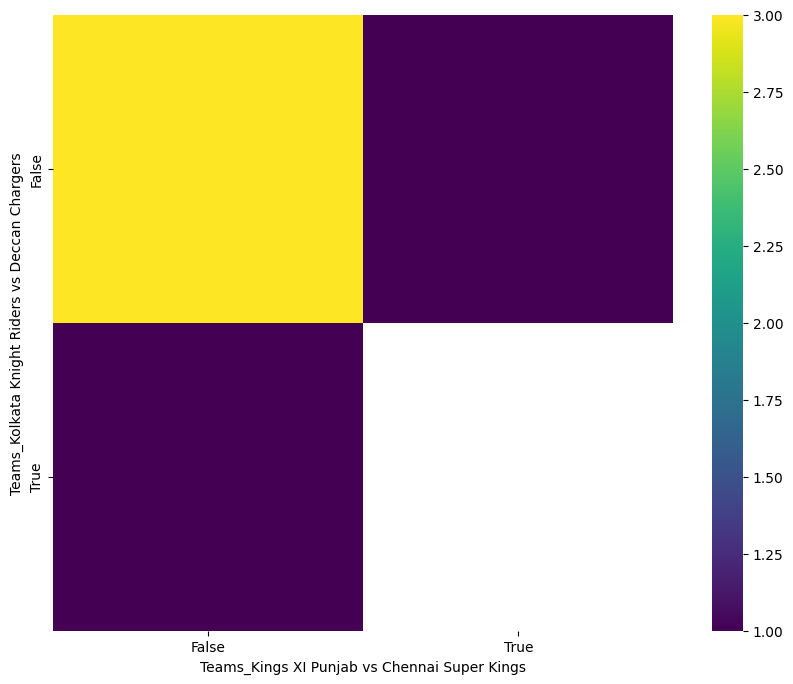

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(10, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Teams_Kolkata Knight Riders vs Deccan Chargers'].value_counts()
    for x_label, grp in _df_21.groupby('Teams_Kings XI Punjab vs Chennai Super Kings')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Teams_Kings XI Punjab vs Chennai Super Kings')
_ = plt.ylabel('Teams_Kolkata Knight Riders vs Deccan Chargers')

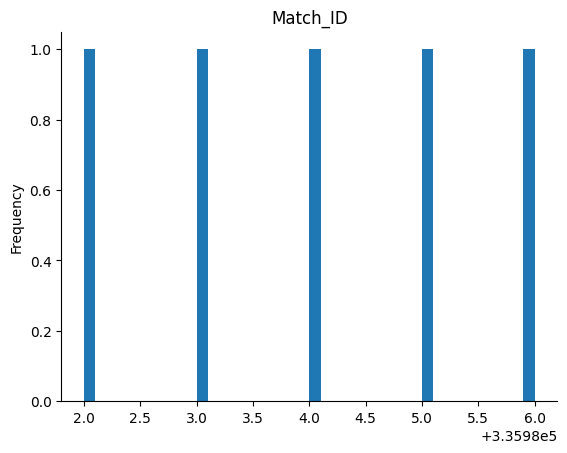

In [7]:
from matplotlib import pyplot as plt
_df_0['Match_ID'].plot(kind='hist', bins=40, title='Match_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

#Un-Supervised_algorithms

<BarContainer object of 1073 artists>

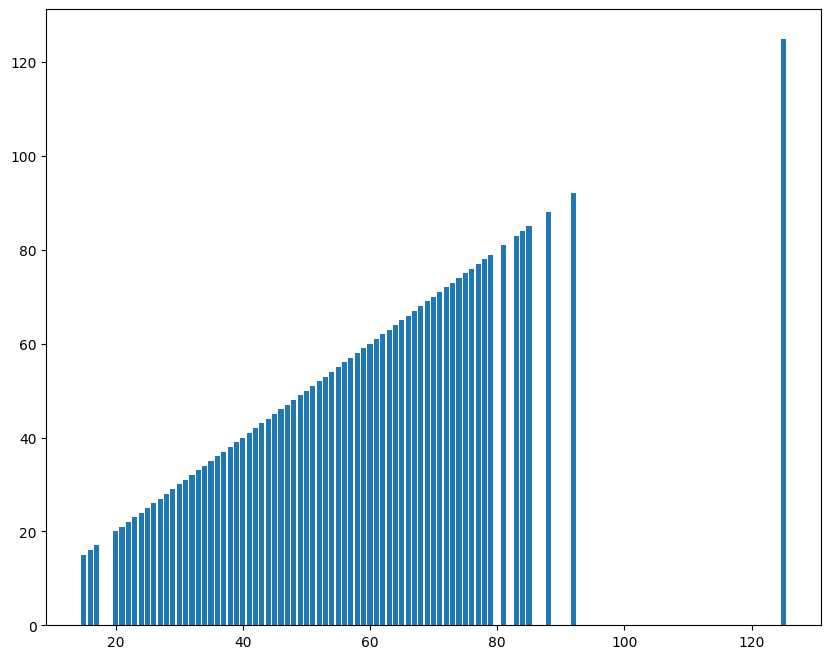

In [61]:
due = df['Powerplay_Scores']
x = df
fig = plt.figure(figsize=(10,8))
plt.bar(due,due.values)


#K-Means Clusteering

      Match_ID  Win_Margin  First_Innings_Score  Second_Innings_Score  \
1041   1422136         6.0                  165                 166.0   
1071   1426286         4.0                  144                 145.0   
243     501267         5.0                  175                 178.0   
801    1216537         7.0                  185                 186.0   
884    1304055        23.0                  193                 170.0   
...        ...         ...                  ...                   ...   
330     598006        44.0                  209                 165.0   
466     829721         7.0                  164                 165.0   
121     419112         8.0                  203                 204.0   
1044   1422139        33.0                  163                 130.0   
860    1254102         5.0                  165                 168.0   

      Powerplay_Scores  Middle_Overs_Scores  Death_Overs_Scores  
1041                48                   84              

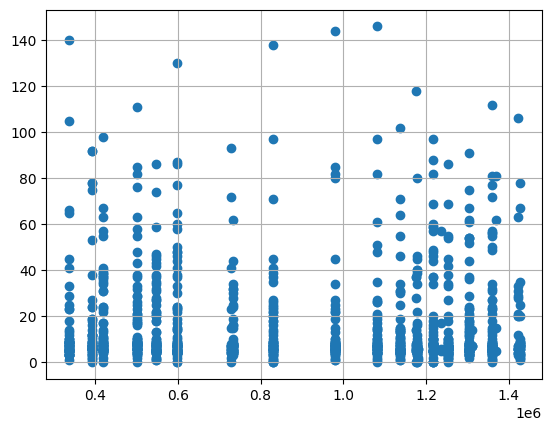

In [63]:
x = df[['Match_ID','Win_Margin','First_Innings_Score','Second_Innings_Score','Powerplay_Scores','Middle_Overs_Scores','Death_Overs_Scores']]
y = df['Venue']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train,"\n",x_test,"\n",y_train,"\n",y_test)
fig = plt.figure(0)
plt.grid(True)
# Access the columns using the .iloc or .loc indexers for Pandas DataFrames:
plt.scatter(x.iloc[:,0], x.iloc[:,1], label='True Position')
plt.show()

[[1.00791482e+06 1.58445378e+01 1.66781513e+02 1.51974790e+02
  4.69663866e+01 7.98361345e+01 3.99789916e+01]
 [5.09950614e+05 1.73296943e+01 1.57644105e+02 1.44054585e+02
  4.35109170e+01 7.51135371e+01 3.90196507e+01]
 [1.28903797e+06 1.69151194e+01 1.73281167e+02 1.60228117e+02
  4.86259947e+01 8.10557029e+01 4.35994695e+01]]


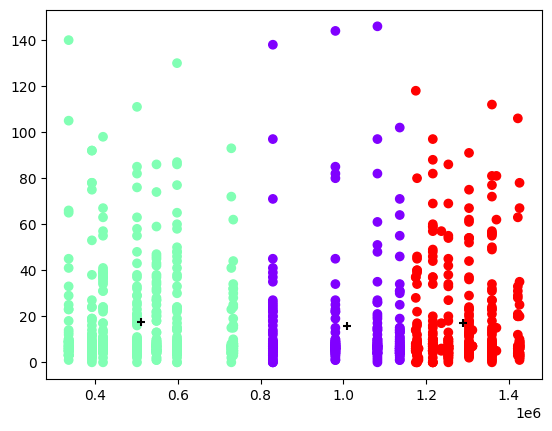

In [69]:
#initially of random_speed on cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
print(kmeans.cluster_centers_)
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
for i in kmeans.cluster_centers_:
  plt.scatter(i[0],i[1],marker='+',color='black')
plt.show()

Descion_Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

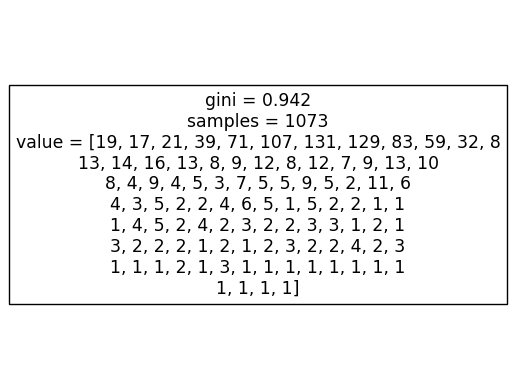

In [79]:
le = LabelEncoder()
df['Teams'] = le.fit_transform(df['Teams'])
df['Venue'] = le.fit_transform(df['Venue'])
df['Toss_Winner'] = le.fit_transform(df['Toss_Winner'])
df['Player_of_Match'] = le.fit_transform(df['Player_of_Match'])
#build
input_x = df[['Teams','Venue','Toss_Winner','Player_of_Match']]
model = DecisionTreeClassifier()
model.fit(input_x,df['Win_Margin'])
#Creation
tree.plot_tree(model,filled=True)
plt.rcParams['figure.figsize'] = [10,10]

## Summary:

### 1. Q&A

The task was to convert string columns in the IPL dataset to numerical representations.  The analysis successfully converted all string columns to numerical forms, including date columns (converted to ordinal values), categorical features (one-hot encoded), and potentially ordinal features (label encoded).

### 2. Data Analysis Key Findings

* **Date Conversion:** The 'Date' column was converted to ordinal values representing days since the earliest date in the dataset.
* **Categorical Encoding:** One-hot encoding was applied to 'Teams', 'Venue', 'Toss_Winner', 'Player_of_Match', 'Umpire', 'Umpire1', 'Umpire2', and 'Match_Winner' columns, significantly increasing the number of columns in the DataFrame.
* **Ordinal Encoding:** Label encoding was applied to 'Toss_Decision' and 'Win_Type' columns, mapping 'field'/'runs' to 0 and 'bat'/'wickets' to 1.
* **Missing Column Handling:** The 'Winning_Team' column was identified as missing during the initial exploration phase.

### 3. Insights or Next Steps

* **Feature Importance Analysis:** Perform feature importance analysis to identify the most relevant numerical features for predictive modeling, considering the large number of features created through one-hot encoding.
* **Model Selection:** Explore different machine learning models (e.g., regression, classification) suitable for the analysis goals and evaluate their performance using appropriate metrics.
